## Task 4: Model Evaluation

In [1]:
! pip install statsmodels


### 1. Evaluate Model Using Metrics (MSE, R-squared)


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("../data/boston_housing.csv")

# Select features and target variable
X = df[['chas', 'nox', 'rm', 'dis', 'ptratio']]  # Features selected earlier
y = df['medv']  # Target variable

# Handle missing values (impute with median)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Load the trained model
model = load("../models/linear_regression_model.pkl")

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate MSE (Mean Squared Error)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error (MSE): {mse_test}")

# Calculate R² (R-squared)
r2_test = r2_score(y_test, y_pred_test)
print(f"Test R² Score: {r2_test}")


Test Mean Squared Error (MSE): 33.77735666107951
Test R² Score: 0.5394025072014197


### 2. Plot Residuals

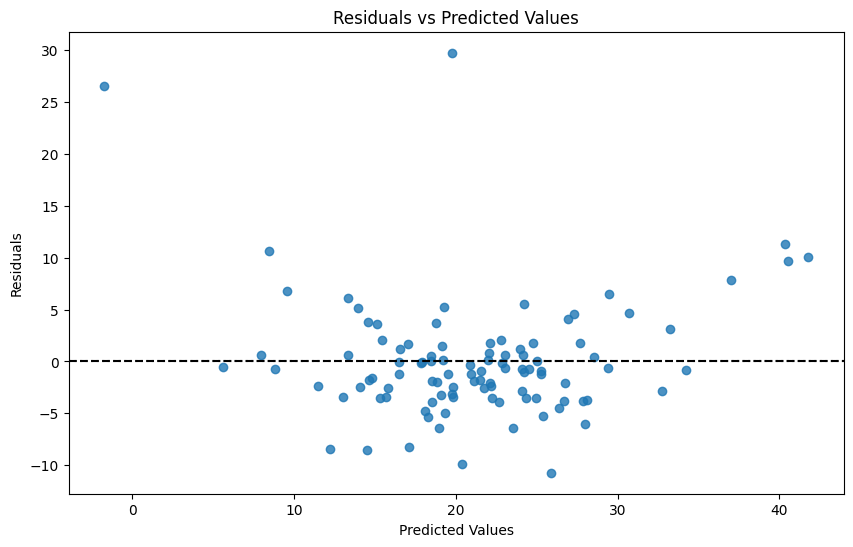

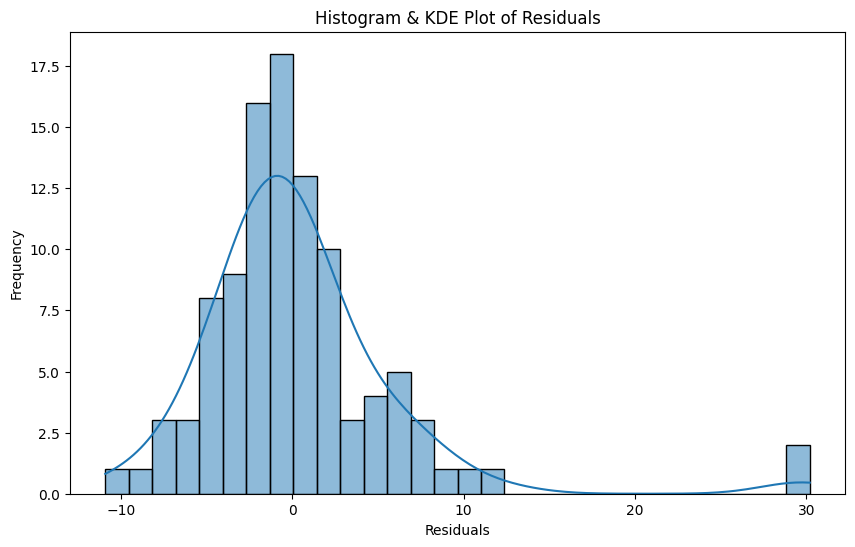

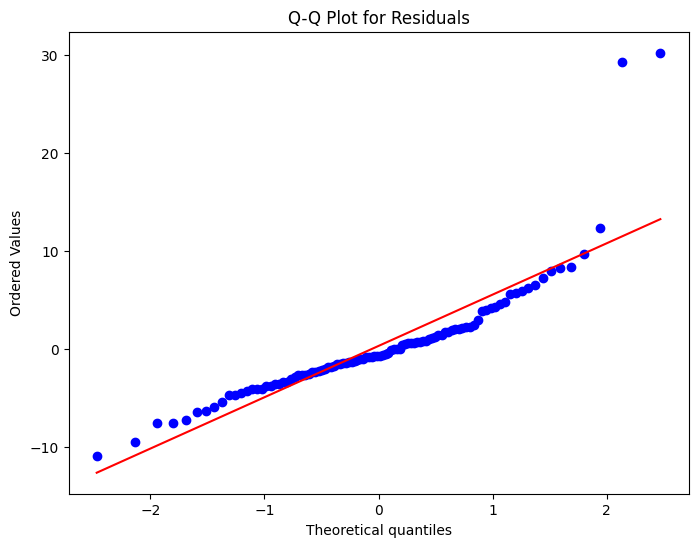

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.metrics import mean_squared_error, r2_score
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("../data/boston_housing.csv")

# Select features and target
X = df[['chas', 'nox', 'rm', 'dis', 'ptratio']]
y = df['medv']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Load trained model
model = load("../models/linear_regression_model.pkl")

# Make predictions
y_pred_test = model.predict(X_test)

# Calculate residuals
residuals = y_test.flatten() - y_pred_test.flatten()

# Residuals vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_test, y=residuals, line_kws={'color': 'red', 'lw': 2})
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Histogram and KDE Plot of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram & KDE Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot (Normality Check)
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()


### 3. Compare Model Performance with Different Feature Sets or Preprocessing Steps


#### Using Different Feature Sets

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/boston_housing.csv")

# Set the target variable
y = df['medv']

# Feature Set 1: Default features
X1 = df[['chas', 'nox', 'rm', 'dis', 'ptratio']]

# Feature Set 2: Additional features
X2 = df[['chas', 'nox', 'rm', 'dis', 'ptratio', 'crim', 'zn', 'indus']]

# Feature Set 3: Minimal features
X3 = df[['rm', 'ptratio']]

# Function to preprocess the data (impute missing values and standardize features)
def preprocess(X_train, X_test):
    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Standardize features (zero mean, unit variance)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    return X_train_scaled, X_test_scaled

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Train and evaluate models with different feature sets
def train_and_evaluate(X, y):
    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocess the data (impute and scale)
    X_train_processed, X_test_processed = preprocess(X_train, X_test)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_processed, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_processed)
    
    # Evaluate the model
    mse, r2 = evaluate_model(y_test, y_pred)
    return mse, r2

# Evaluate Model 1 (Feature Set 1)
mse1, r21 = train_and_evaluate(X1, y)
print(f"Feature Set 1 - MSE: {mse1:.4f}, R²: {r21:.4f}")

# Evaluate Model 2 (Feature Set 2)
mse2, r22 = train_and_evaluate(X2, y)
print(f"Feature Set 2 - MSE: {mse2:.4f}, R²: {r22:.4f}")

# Evaluate Model 3 (Feature Set 3)
mse3, r23 = train_and_evaluate(X3, y)
print(f"Feature Set 3 - MSE: {mse3:.4f}, R²: {r23:.4f}")


Feature Set 1 - MSE: 33.7757, R²: 0.5394
Feature Set 2 - MSE: 31.9038, R²: 0.5650
Feature Set 3 - MSE: 38.0502, R²: 0.4811


#### Using Different Preprocessing Steps

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("../data/boston_housing.csv")

# Set the target variable
y = df['medv']

# Define feature set (for consistency across experiments)
X = df[['chas', 'nox', 'rm', 'dis', 'ptratio', 'crim', 'zn', 'indus']]

# Function to preprocess the data with different imputation and scaling strategies
def preprocess(X_train, X_test, imputer_strategy='median', scaler=None):
    # Impute missing values using selected strategy
    imputer = SimpleImputer(strategy=imputer_strategy)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Apply scaling (if specified)
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)
    else:
        X_train_scaled, X_test_scaled = X_train_imputed, X_test_imputed
    
    return X_train_scaled, X_test_scaled

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Function to train and evaluate the model
def train_and_evaluate(X, y, imputer_strategy='median', scaler=None):
    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocess the data (impute and scale)
    X_train_processed, X_test_processed = preprocess(X_train, X_test, imputer_strategy, scaler)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_processed, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_processed)
    
    # Evaluate the model
    mse, r2 = evaluate_model(y_test, y_pred)
    return mse, r2

# Evaluate using different preprocessing strategies
strategies = [
    ('Median Imputation + Standard Scaling', 'median', StandardScaler()),
    ('Mean Imputation + Standard Scaling', 'mean', StandardScaler()),
    ('Mode Imputation + Standard Scaling', 'most_frequent', StandardScaler()),
    ('Median Imputation + MinMax Scaling', 'median', MinMaxScaler()),
    ('Median Imputation + No Scaling', 'median', None),
]

for name, imputer_strategy, scaler in strategies:
    mse, r2 = train_and_evaluate(X, y, imputer_strategy, scaler)
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")


Median Imputation + Standard Scaling - MSE: 31.9038, R²: 0.5650
Mean Imputation + Standard Scaling - MSE: 31.8000, R²: 0.5664
Mode Imputation + Standard Scaling - MSE: 31.9875, R²: 0.5638
Median Imputation + MinMax Scaling - MSE: 31.9038, R²: 0.5650
Median Imputation + No Scaling - MSE: 31.9038, R²: 0.5650
